<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/station-degree-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

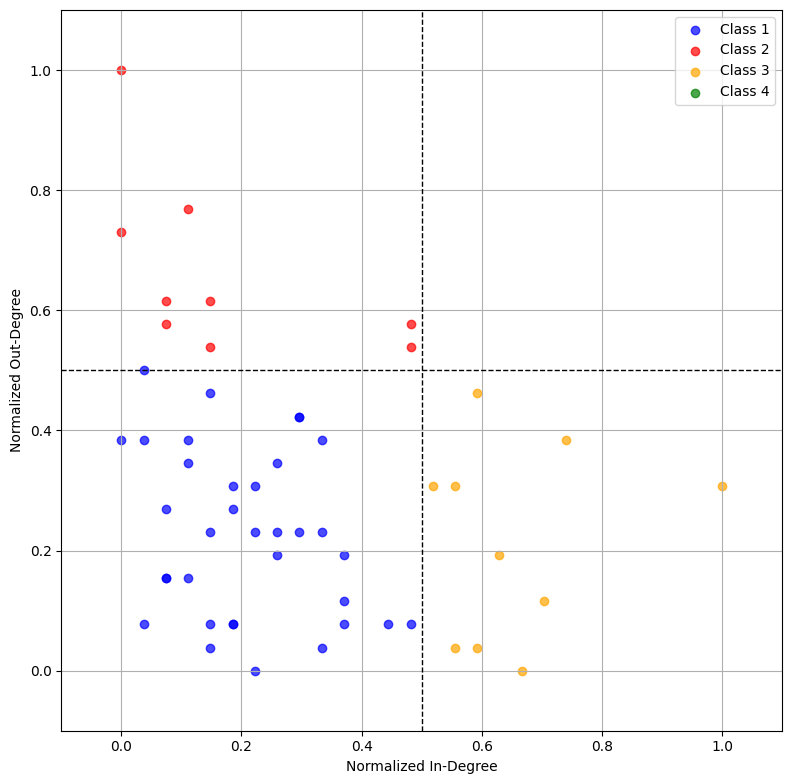

--- Node Classification (Threshold = 0.5) ---
class_1= ['Farsta strand', 'Stockholm Odenplan', 'Barkarby', 'Spånga', 'Häggvik', 'Sundbyberg', 'Jordbro', 'Sollentuna', 'Solna', 'Stuvsta', 'Huddinge', 'Skogås', 'Norrviken', 'Tumba', 'Södertälje hamn', 'Handen', 'Vega', 'Tullinge', 'Krigslida', 'Hemfosa', 'Tungelsta', 'Segersäng', 'Knivsta', 'Kungsängen', 'Kallhäll', 'Trångsund', 'Arlanda central', 'Södertälje syd', 'Järna', 'Mölnbo', 'Bålsta', 'Bro', 'Gnesta', 'Södertälje centrum', 'Västerhaninge']
class_2= ['Stockholms södra', 'Älvsjö', 'Ösmo', 'Flemingsberg', 'Rönninge', 'Nynäsgård', 'Gröndalsviken', 'Nynäshamn', 'Östertälje']
class_3= ['Ulriksdal', 'Årstaberg', 'Stockholm City', 'Helenelund', 'Upplands Väsby', 'Jakobsberg', 'Rotebro', 'Rosersberg', 'Märsta', 'Uppsala C']
class_4= []


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import io

data_morning = """
Node,Degree,In_Degree,Out_Degree,Betweenness
Stockholm Odenplan,30,16,14,0.034897
Krigslida,26,9,17,0.017588
Årstaberg,17,7,10,0.016606
Stockholms södra,14,5,9,0.014421
Handen,14,2,12,0.012048
Norrviken,23,15,8,0.009604
Upplands Väsby,24,20,4,0.009594
Stockholm City,13,7,6,0.008934
Spånga,13,9,4,0.008598
Ulriksdal,17,12,5,0.008431
Stuvsta,14,8,6,0.007587
Solna,20,13,7,0.007310
Trångsund,12,4,8,0.006946
Älvsjö,13,4,9,0.006543
Tumba,12,4,8,0.006499
Huddinge,10,3,7,0.006396
Vega,12,5,7,0.006168
Jordbro,14,3,11,0.005666
Kallhäll,22,17,5,0.005447
Hemfosa,12,4,8,0.004836
Häggvik,12,7,5,0.004750
Nynäsgård,25,3,22,0.004308
Arlanda central,13,10,3,0.003999
Västerhaninge,8,4,4,0.003558
Helenelund,6,2,4,0.003175
Jakobsberg,14,12,2,0.003118
Rönninge,15,3,12,0.003078
Flemingsberg,14,4,10,0.002752
Ösmo,15,2,13,0.002625
Tullinge,11,3,8,0.002534
Bro,13,12,1,0.002447
Sundbyberg,10,5,5,0.002353
Tungelsta,19,6,13,0.002002
Rotebro,9,7,2,0.001927
Skogås,11,6,5,0.001703
Kungsängen,23,21,2,0.001693
Segersäng,14,2,12,0.001470
Barkarby,10,6,4,0.001291
Gröndalsviken,5,1,4,0.000998
Farsta strand,4,1,3,0.000454
Mölnbo,8,6,2,0.000363
Uppsala C,11,11,0,0.000000
Sollentuna,9,8,1,0.000000
Bålsta,11,11,0,0.000000
Knivsta,9,8,1,0.000000
Rosersberg,19,19,0,0.000000
Märsta,7,7,0,0.000000
Järna,2,1,1,0.000000
Gnesta,2,2,0,0.000000
Nynäshamn,22,2,20,0.000000
Södertälje centrum,4,0,4,0.000000
Södertälje hamn,14,0,14,0.000000
Södertälje syd,12,3,9,0.000000
Östertälje,11,0,11,0.000000
"""
# 1. 存储新的数据
data_evening = """
Node,Degree,In_Degree,Out_Degree,Betweenness
Ulriksdal,30,20,10,0.023659
Årstaberg,28,16,12,0.020109
Stockholm City,22,14,8,0.017037
Farsta strand,12,5,7,0.014138
Stockholms södra,27,13,14,0.013614
Helenelund,23,15,8,0.013596
Stockholm Odenplan,19,8,11,0.013062
Älvsjö,28,13,15,0.011599
Upplands Väsby,35,27,8,0.009667
Barkarby,12,7,5,0.009585
Spånga,13,10,3,0.008004
Häggvik,12,6,6,0.007514
Sundbyberg,15,10,5,0.007033
Jordbro,13,3,10,0.006540
Sollentuna,15,9,6,0.005156
Jakobsberg,17,16,1,0.005032
Ösmo,18,4,14,0.004981
Solna,16,7,9,0.004866
Stuvsta,19,9,10,0.004843
Rotebro,22,17,5,0.004506
Huddinge,19,8,11,0.003673
Flemingsberg,20,4,16,0.003494
Skogås,10,4,6,0.003112
Norrviken,15,13,2,0.003063
Tumba,9,2,7,0.002904
Södertälje hamn,14,1,13,0.002794
Handen,12,3,9,0.002743
Rönninge,17,2,15,0.002346
Rosersberg,22,19,3,0.001597
Vega,7,3,4,0.001588
Tullinge,16,4,12,0.001573
Krigslida,14,8,6,0.001185
Hemfosa,14,6,8,0.001067
Tungelsta,13,7,6,0.000779
Segersäng,13,5,8,0.000779
Nynäsgård,23,3,20,0.000772
Gröndalsviken,18,2,16,0.000629
Knivsta,14,12,2,0.000496
Kungsängen,5,4,1,0.000455
Kallhäll,7,5,2,0.000403
Trångsund,6,2,4,0.000395
Arlanda central,7,5,2,0.000363
Södertälje syd,6,2,4,0.000302
Järna,3,1,2,0.000121
Mölnbo,6,4,2,0.000121
Bålsta,10,9,1,0.000000
Märsta,16,15,1,0.000000
Bro,12,10,2,0.000000
Uppsala C,18,18,0,0.000000
Gnesta,6,6,0,0.000000
Nynäshamn,26,0,26,0.000000
Södertälje centrum,10,0,10,0.000000
Västerhaninge,11,1,10,0.000000
Östertälje,19,0,19,0.000000
"""


data=data_evening

# 2. 使用 pandas 读取数据
df = pd.read_csv(io.StringIO(data))

# 3. 提取节点名称和度数
nodes = list(df['Node'])
in_degrees = df['In_Degree'].values.reshape(-1, 1)
out_degrees = df['Out_Degree'].values.reshape(-1, 1)

# 4. 标准化度数到 [0, 1] 区间
scaler = MinMaxScaler()
in_degrees_scaled = scaler.fit_transform(in_degrees).flatten()
out_degrees_scaled = scaler.fit_transform(out_degrees).flatten()

# 5. 定义新的分类阈值
threshold = 0.5

# 6. 根据新的阈值创建四个区域的掩码
mask_ll = (in_degrees_scaled <= threshold) & (out_degrees_scaled <= threshold)  # 左下 (Class 1)
mask_lu = (in_degrees_scaled <= threshold) & (out_degrees_scaled > threshold)   # 左上 (Class 2)
mask_rl = (in_degrees_scaled > threshold) & (out_degrees_scaled <= threshold)   # 右下 (Class 3)
mask_ru = (in_degrees_scaled > threshold) & (out_degrees_scaled > threshold)    # 右上 (Class 4)

# 7. 绘图
plt.figure(figsize=(8, 8))

# 为每个类别绘制散点
plt.scatter(in_degrees_scaled[mask_ll], out_degrees_scaled[mask_ll], color='blue', alpha=0.7, label='Class 1')
plt.scatter(in_degrees_scaled[mask_lu], out_degrees_scaled[mask_lu], color='red', alpha=0.7, label='Class 2')
plt.scatter(in_degrees_scaled[mask_rl], out_degrees_scaled[mask_rl], color='orange', alpha=0.7, label='Class 3')
plt.scatter(in_degrees_scaled[mask_ru], out_degrees_scaled[mask_ru], color='green', alpha=0.7, label='Class 4')

# 绘制辅助线
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=1)
plt.axhline(y=threshold, color='black', linestyle='--', linewidth=1)

# 设置图表属性
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Normalized In-Degree')
plt.ylabel('Normalized Out-Degree')
# plt.title('Normalized In-Degree vs Out-Degree (Threshold = 0.5)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 显示图像
plt.show()

# 8. (可选) 打印每个区域的节点列表
def print_nodes_list(region_name, mask, all_nodes):
    idxs = np.where(mask)[0]
    stations = [all_nodes[i] for i in idxs]
    print(f"{region_name}= {stations}")
    # print(f"Count: {len(stations)}\n")

print("--- Node Classification (Threshold = 0.5) ---")
print_nodes_list("class_1", mask_ll, nodes)
print_nodes_list("class_2", mask_lu, nodes)
print_nodes_list("class_3", mask_rl, nodes)
print_nodes_list("class_4", mask_ru, nodes)